In [23]:
from pyDOE import lhs
import numpy as np
import matplotlib.pyplot as plt

In [17]:
lb = np.array([0, 0])
ub = np.array([1.1, 0.41])

In [3]:
wall_up = [0.0, 0.41] + [1.1, 0.0] * pyDOE.lhs(2, 441)
wall_lw = [0.0, 0.00] + [1.1, 0.0] * pyDOE.lhs(2, 441)

In [4]:
wall_up

array([[0.8102696 , 0.41      ],
       [0.03079503, 0.41      ],
       [0.55393103, 0.41      ],
       [0.20858646, 0.41      ],
       [0.67167821, 0.41      ],
       [0.02578401, 0.41      ],
       [0.5820633 , 0.41      ],
       [0.76798235, 0.41      ],
       [0.54275051, 0.41      ],
       [0.18414815, 0.41      ],
       [0.14411826, 0.41      ],
       [0.43679788, 0.41      ],
       [0.29034366, 0.41      ],
       [0.76566738, 0.41      ],
       [0.22575529, 0.41      ],
       [0.13380254, 0.41      ],
       [0.12981952, 0.41      ],
       [0.73448113, 0.41      ],
       [0.78513605, 0.41      ],
       [0.04608026, 0.41      ],
       [0.38496541, 0.41      ],
       [0.27337343, 0.41      ],
       [0.06718081, 0.41      ],
       [0.53917726, 0.41      ],
       [0.05750381, 0.41      ],
       [0.26160173, 0.41      ],
       [0.70286309, 0.41      ],
       [1.07429334, 0.41      ],
       [0.04991447, 0.41      ],
       [0.34364925, 0.41      ],
       [0.

In [7]:
r = 0.05
theta = [0.0] + [2*np.pi] * pyDOE.lhs(1, 251)
x_CYLD = np.multiply(r, np.cos(theta))+0.2
y_CYLD = np.multiply(r, np.sin(theta))+0.2
CYLD = np.concatenate((x_CYLD, y_CYLD), 1)

In [8]:
CYLD

array([[0.18185836, 0.24659271],
       [0.16192795, 0.23241171],
       [0.15290656, 0.21679903],
       [0.15001643, 0.20128182],
       [0.15015082, 0.1961194 ],
       [0.18180044, 0.15342988],
       [0.1582879 , 0.22756993],
       [0.18546999, 0.15215777],
       [0.16101228, 0.23130427],
       [0.24433308, 0.22312094],
       [0.17124167, 0.24090182],
       [0.19590747, 0.24983223],
       [0.24026414, 0.22964454],
       [0.21122193, 0.15127559],
       [0.18104471, 0.24626767],
       [0.17868933, 0.24523113],
       [0.19401151, 0.15035992],
       [0.24780295, 0.21465871],
       [0.24565642, 0.17961639],
       [0.24841888, 0.21247447],
       [0.15950432, 0.17067254],
       [0.23508318, 0.23562542],
       [0.1760416 , 0.24388616],
       [0.22659967, 0.15766257],
       [0.15318321, 0.18244471],
       [0.24999593, 0.19936167],
       [0.15691432, 0.22536974],
       [0.20487707, 0.24976157],
       [0.17478894, 0.15682127],
       [0.17815462, 0.15502468],
       [0.

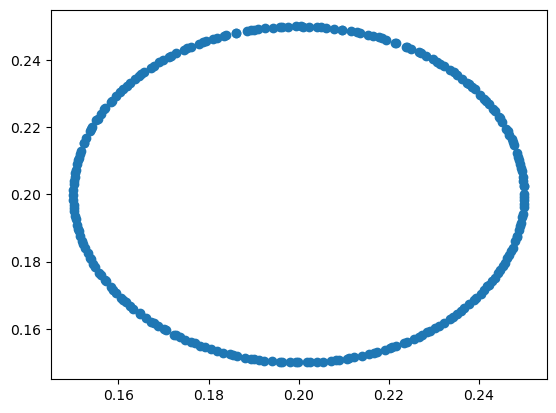

In [12]:
plt.scatter(CYLD[:,0],CYLD[:,1])

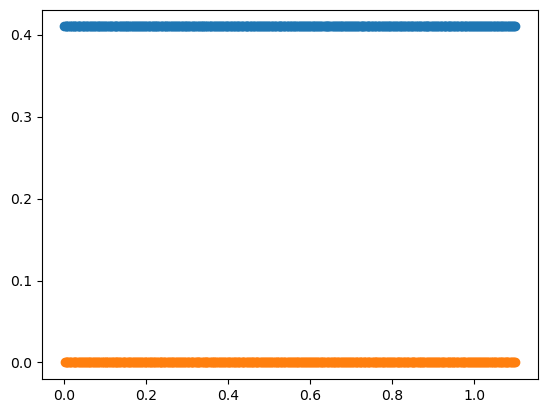

In [14]:
plt.scatter(wall_up[:,0],wall_up[:,1])
plt.scatter(wall_lw[:,0],wall_lw[:,1])

In [15]:
WALL = np.concatenate((CYLD, wall_up, wall_lw), 0)

In [18]:
def DelCylPT(XY_c, xc=0.0, yc=0.0, r=0.1):
    '''
    delete points within cylinder
    '''
    dst = np.array([((xy[0] - xc) ** 2 + (xy[1] - yc) ** 2) ** 0.5 for xy in XY_c])
    return XY_c[dst>r,:]

In [19]:
# Collocation point for equation residual
XY_c = lb + (ub - lb) * pyDOE.lhs(2, 40000)
XY_c_refine = [0.1, 0.1] + [0.2, 0.2] * pyDOE.lhs(2, 10000)
XY_c = np.concatenate((XY_c, XY_c_refine), 0)
XY_c = DelCylPT(XY_c, xc=0.2, yc=0.2, r=0.05)

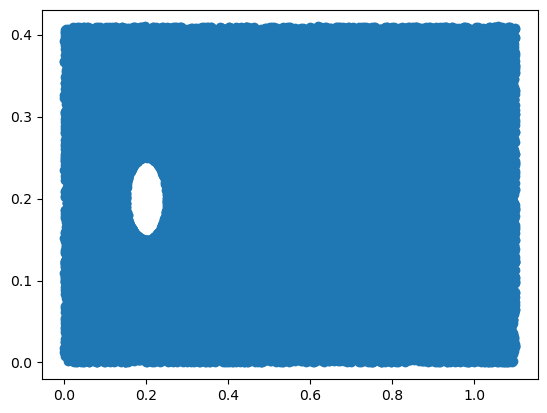

In [21]:
plt.scatter(XY_c[:,0], XY_c[:,1])

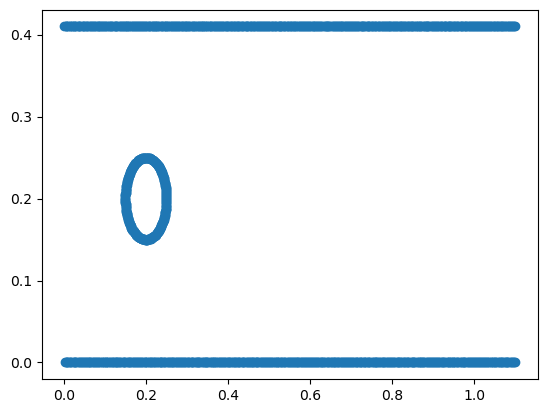

In [22]:
plt.scatter(WALL[:,0], WALL[:,1])

(47338, 2)


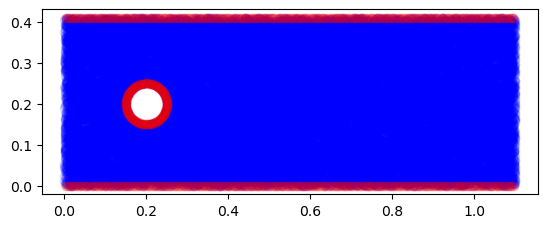

In [30]:
lb = np.array([0, 0])
ub = np.array([1.1, 0.41])

# Network configuration
uv_layers = [2] + 8*[40] + [5]

# WALL = [x, y], u=v=0
wall_up = [0.0, 0.41] + [1.1, 0.0] * lhs(2, 441)
wall_lw = [0.0, 0.00] + [1.1, 0.0] * lhs(2, 441)

# INLET = [x, y, u, v]
U_max = 1.0
INLET = [0.0, 0.0] + [0.0, 0.41] * lhs(2, 201)
y_INLET = INLET[:,1:2]
u_INLET = 4*U_max*y_INLET*(0.41-y_INLET)/(0.41**2)
v_INLET = 0*y_INLET
INLET = np.concatenate((INLET, u_INLET, v_INLET), 1)

# plt.scatter(INLET[:, 1:2], INLET[:, 2:3], marker='o', alpha=0.2, color='red')
# plt.show()

# INLET = [x, y], p=0
OUTLET = [1.1, 0.0] + [0.0, 0.41] * lhs(2, 201)

# Cylinder surface
r = 0.05
theta = [0.0] + [2*np.pi] * lhs(1, 251)
x_CYLD = np.multiply(r, np.cos(theta))+0.2
y_CYLD = np.multiply(r, np.sin(theta))+0.2
CYLD = np.concatenate((x_CYLD, y_CYLD), 1)

WALL = np.concatenate((CYLD, wall_up, wall_lw), 0)

# Collocation point for equation residual
XY_c = lb + (ub - lb) * lhs(2, 40000)
XY_c_refine = [0.1, 0.1] + [0.2, 0.2] * lhs(2, 10000)
XY_c = np.concatenate((XY_c, XY_c_refine), 0)
XY_c = DelCylPT(XY_c, xc=0.2, yc=0.2, r=0.05)


print(XY_c.shape)

# Visualize the collocation points
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(XY_c[:,0:1], XY_c[:,1:2], marker='o', alpha=0.1 ,color='blue')
plt.scatter(WALL[:,0:1], WALL[:,1:2], marker='o', alpha=0.1 ,color='red')
#plt.scatter(WALL[:,0:1], WALL[:,1:2], marker='o', alpha=0.2 , color='green')
#plt.scatter(OUTLET[:, 0:1], OUTLET[:, 1:2], marker='o', alpha=0.2, color='orange')
#plt.scatter(INLET[:, 0:1], INLET[:, 1:2], marker='o', alpha=0.2, color='red')
plt.show()

In [39]:
XY_c[:,0:1]

array([[0.00923125],
       [0.49266438],
       [0.43622272],
       ...,
       [0.25949777],
       [0.26713213],
       [0.18807285]])

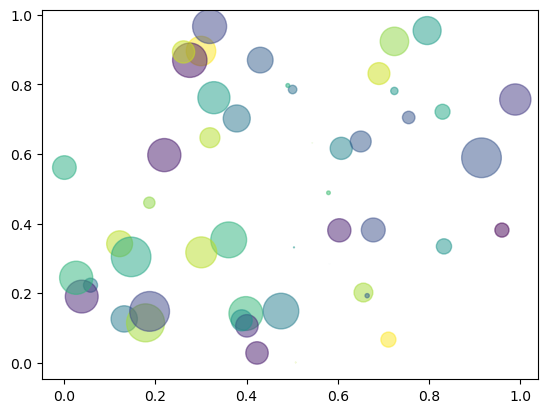

In [40]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [41]:
x

array([0.39858805, 0.50401389, 0.30033651, 0.43006967, 0.71085305,
       0.27579684, 0.12208347, 0.6033059 , 0.50097763, 0.26210168,
       0.13218021, 0.82940939, 0.36098048, 0.67767632, 0.60753322,
       0.21998848, 0.75525869, 0.72404414, 0.14724749, 0.40084662,
       0.57958599, 0.6501873 , 0.05831737, 0.4754932 , 0.30091593,
       0.31921109, 0.03910072, 0.3198799 , 0.50770236, 0.58170991,
       0.8325229 , 0.72387563, 0.37862783, 0.54412278, 0.69014078,
       0.7956331 , 0.38946296, 0.02693319, 0.32862437, 0.65612331,
       0.18716146, 0.66430194, 0.42304591, 0.95947154, 0.91473355,
       0.00111927, 0.98876266, 0.1789356 , 0.18778427, 0.49050714])

In [42]:
y

array([1.41113746e-01, 3.31369070e-01, 8.96212515e-01, 8.70077134e-01,
       6.60492031e-02, 8.69662472e-01, 3.41810095e-01, 3.80420963e-01,
       7.85433823e-01, 8.93464755e-01, 1.25563753e-01, 7.21464295e-01,
       3.52956030e-01, 3.81440929e-01, 6.16186810e-01, 5.96765724e-01,
       7.04975569e-01, 9.23867527e-01, 3.04004708e-01, 1.05651051e-01,
       4.88330971e-01, 6.35914651e-01, 2.22546701e-01, 1.48138164e-01,
       3.17022821e-01, 9.66730983e-01, 1.89843350e-01, 6.46787383e-01,
       2.77211998e-04, 2.84372607e-01, 3.34212094e-01, 7.81294003e-01,
       7.02172480e-01, 6.32011757e-01, 8.31304817e-01, 9.54952550e-01,
       1.21504163e-01, 2.43952159e-01, 7.61877768e-01, 2.01454548e-01,
       4.59869699e-01, 1.92406666e-01, 2.77235975e-02, 3.81102818e-01,
       5.89028826e-01, 5.60915081e-01, 7.56653419e-01, 1.14247358e-01,
       1.47173821e-01, 7.97006072e-01])

In [49]:
area.size

50

In [45]:
colors

array([0.66393286, 0.52377397, 0.99801615, 0.3015019 , 0.9990489 ,
       0.06021117, 0.89485577, 0.09135373, 0.37431767, 0.91923978,
       0.41868588, 0.59585402, 0.6452831 , 0.25048708, 0.45824894,
       0.08153512, 0.2721866 , 0.82980871, 0.59991681, 0.12541086,
       0.68978613, 0.29062577, 0.40872501, 0.42993397, 0.89297221,
       0.22093407, 0.10574091, 0.8870608 , 0.89366633, 0.58787819,
       0.52266273, 0.53438575, 0.39837437, 0.82558294, 0.92459014,
       0.55480836, 0.50830671, 0.65334629, 0.55879005, 0.86565558,
       0.83072852, 0.31751458, 0.07770111, 0.00897973, 0.27019621,
       0.622686  , 0.18052437, 0.8623859 , 0.22338164, 0.62582471])